In [1]:
import os
import cv2
import imutils

from pyzbar import pyzbar
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
imgs_dir = 'images'
imgs = os.listdir(imgs_dir)

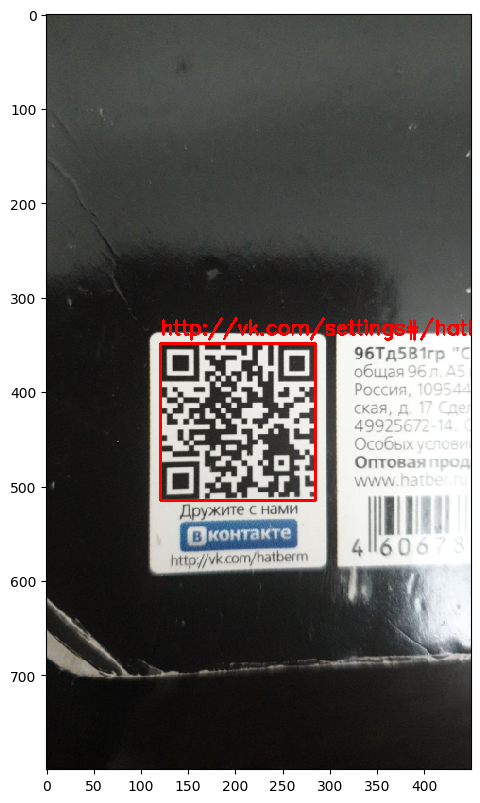

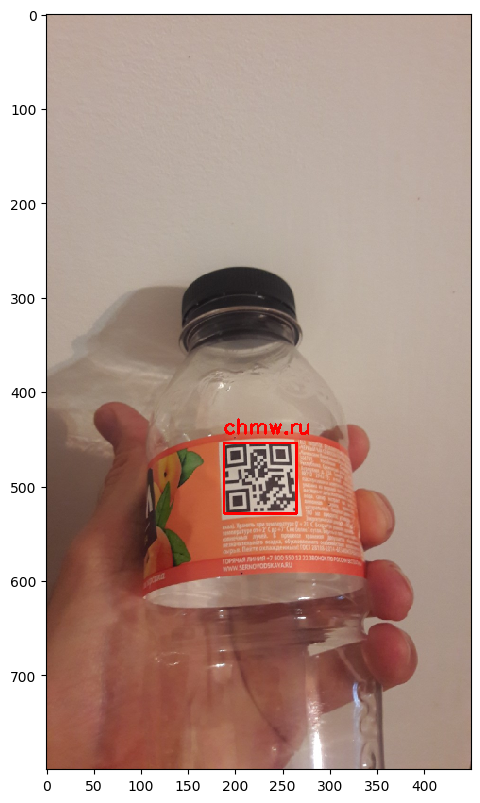

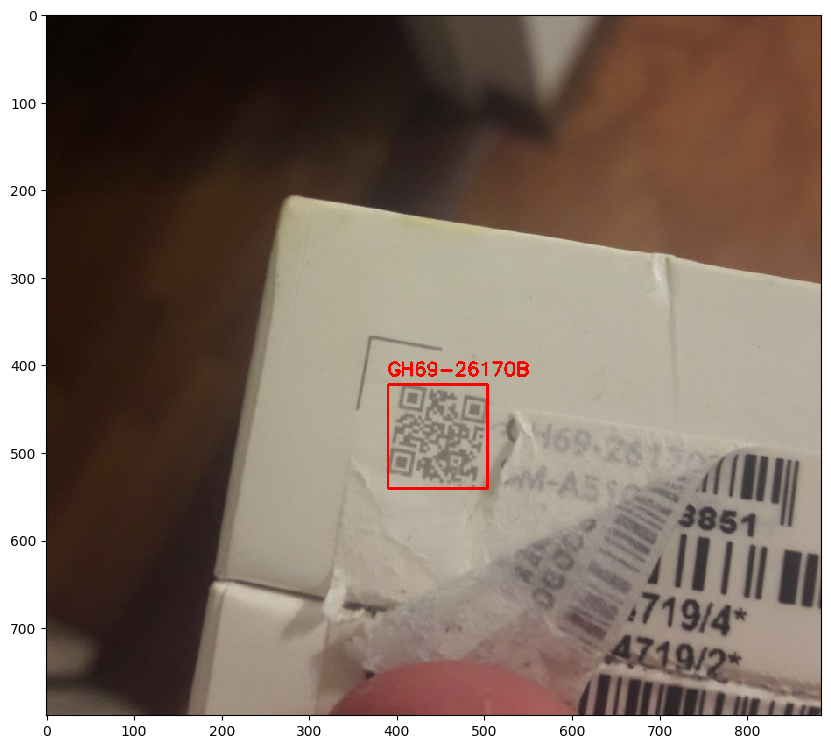

In [3]:
for img_name in imgs:
    img = cv2.imread(os.path.join(imgs_dir,img_name))
    img = imutils.resize(img, height=800)
    
    barcodes = pyzbar.decode(img)
    
    for barcode in barcodes:
        x,y,w,h = barcode.rect
        cv2.rectangle(img, (x,y), (x+w, y+h), (0,0,255),2)
        data = barcode.data.decode("utf-8")
        
        cv2.putText(img, data, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        img = img[:,:,::-1]
        
        plt.figure(figsize=(10, 10), dpi= 100)
        plt.imshow(img)
        plt.show()